#### PRELIMINARIES

First we import the libraries we will need, and the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Import data

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data = data.drop(['Random 1', 'Random 2', 'Gross pay transform'],  axis=1)

In [3]:
data

,Gross pay,Phi-h,Position,Pressure,Production
0,0.1,0.5,2.1,19,15.10
1,1.0,4.0,1.1,16,21.30
2,1.9,19.0,1.0,14,22.75
3,3.1,21.7,2.1,17,15.72
4,4.1,24.6,2.9,11,7.71
5,4.9,39.2,1.1,12,22.67
6,5.9,23.6,2.1,13,18.11
7,7.0,63.0,2.0,13,24.30
8,8.1,72.9,2.9,14,24.04
9,8.9,35.6,2.8,16,25.11


A quick summary of the data (count row) shows there are no missing data points.

In [4]:
data.describe()

,Gross pay,Phi-h,Position,Pressure,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,33.428571
std,5.948521,45.167894,0.708721,2.759400,15.141909
min,0.100000,0.500000,1.000000,10.000000,7.710000
25%,4.900000,24.600000,1.100000,14.000000,22.670000
50%,10.000000,72.900000,2.000000,16.000000,36.420000
75%,15.100000,100.000000,2.200000,17.000000,44.200000
max,19.100000,160.000000,2.900000,20.000000,59.200000


We can also explicitly test to ensure data does not have no missing measurements.

In [5]:
data.isnull().values.any()

False

#### Multiple regression

1) Ordinary Least Square in Statsmodels

2) Linear Regression fit in Scikit-learn

In [6]:
X = data.loc[:,'Gross pay':'Pressure']
y = data.loc[:,'Production']

##### Ordinary Least Square in Statsmodels

In [7]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print results.summary() 

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     211.1
Date:                Thu, 08 Feb 2018   Prob (F-statistic):           1.27e-13
Time:                        20:16:06   Log-Likelihood:                -44.514
No. Observations:                  21   AIC:                             99.03
Df Residuals:                      16   BIC:                             104.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7089      3.454     -0.495      0.6

In [30]:
print(results.params)

const       -1.708930
Gross pay    1.368181
Phi-h        0.106817
Position    -6.657512
Pressure     1.759371
dtype: float64


In [8]:
r = results.rsquared**0.5
p = results.f_pvalue

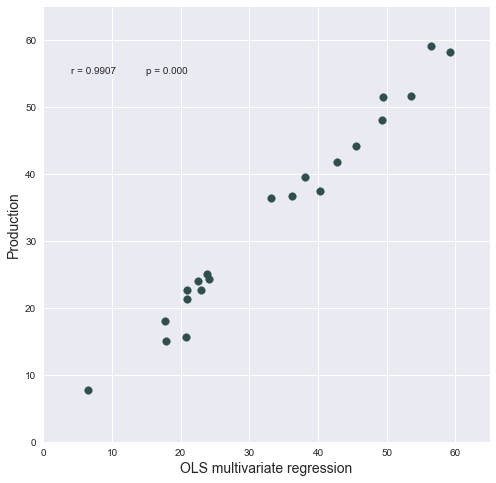

In [9]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(results.predict(), y, s = 60, color="darkslategray")

ax1.set_ylabel('Production', fontsize = '14')
ax1.set_xlim([0, 65])
ax1.set_ylim([0, 65])
ax1.set_xlabel('OLS multivariate regression', fontsize = '14')

ax1.annotate("r = {:.4f}".format(r), xy=(4, 55))
ax1.annotate("p = {:.3f}".format(p), xy=(15, 55));

In [10]:
rsl = results.get_prediction()

[method_name for method_name in dir(rsl)
 if callable(getattr(rsl, method_name))]

['__class__',
 '__delattr__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'conf_int',
 'dist',
 'summary_frame']

In [11]:
print rsl.conf_int().T[0]         # lower CI
print rsl.conf_int(obs=True).T[0] # lower PI

print rsl.conf_int().T[1]         # upper CI
print rsl.conf_int(obs=True).T[1] # upper PI

[ 15.25047254  18.41940688  18.50628739  18.93106243   3.91973641
  20.65897995  15.93537454  22.5659432   20.1183334   21.80720016
  34.04905147  31.86441428  35.35445127  47.44393828  46.77243525
  51.4222193   53.27964091  56.23753412  40.38456507  42.84604361
  37.11991558]
[ 12.34926864  15.4199823   15.4480256   15.547178     1.00642166
  17.55821843  12.54635255  19.00872395  17.04816407  18.50252215
  30.82846583  28.04720349  32.47767211  44.13016414  43.78369619
  48.17843462  50.59602261  53.47539365  37.34289786  39.9631566
  34.45284697]
[ 20.60665968  23.40697264  23.28135602  22.62672685   9.22948616
  25.28418347  19.61516921  25.74330323  24.85111318  25.75175339
  38.26698097  34.32308826  40.80517093  51.35949663  51.79924206
  55.56375069  59.52291621  62.1485134   45.21896498  48.2730123
  43.43513372]
[ 23.50786358  26.40639721  26.3396178   26.01061127  12.14280091
  28.38494499  23.0041912   29.30052248  27.92128251  29.0564314
  41.48756662  38.14029905  43.681

In [12]:
rsl.summary_frame() 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.928566,1.263308,15.250473,20.606660,12.349269,23.507864
1,20.913190,1.176365,18.419407,23.406973,15.419982,26.406397
2,20.893822,1.126246,18.506287,23.281356,15.448026,26.339618
3,20.778895,0.871658,18.931062,22.626727,15.547178,26.010611
4,6.574611,1.252355,3.919736,9.229486,1.006422,12.142801
5,22.971582,1.090899,20.658980,25.284183,17.558218,28.384945
6,17.775272,0.867915,15.935375,19.615169,12.546353,23.004191
7,24.154623,0.749411,22.565943,25.743303,19.008724,29.300522
8,22.484723,1.116272,20.118333,24.851113,17.048164,27.921283
9,23.779477,0.930361,21.807200,25.751753,18.502522,29.056431


In [13]:
data['obs_pi_lower'] = rsl.summary_frame()['obs_ci_lower'] 
data['obs_pi_upper'] = rsl.summary_frame()['obs_ci_upper']

data['prediction'] = results.predict()
#data['prediction'] = rsl.summary_frame(['mean']) # would be the same
data.describe()

,Gross pay,Phi-h,Position,Pressure,Production,obs_pi_lower,obs_pi_upper,prediction
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,33.428571,27.986229,38.870914,33.428571
std,5.948521,45.167894,0.708721,2.759400,15.141909,14.932282,15.071133,15.000427
min,0.100000,0.500000,1.000000,10.000000,7.710000,1.006422,12.142801,6.574611
25%,4.900000,24.600000,1.100000,14.000000,22.670000,15.547178,26.406397,20.913190
50%,10.000000,72.900000,2.000000,16.000000,36.420000,28.047203,38.140299,33.093751
75%,15.100000,100.000000,2.200000,17.000000,44.200000,39.963157,51.155899,45.559528
max,19.100000,160.000000,2.900000,20.000000,59.200000,53.475394,64.910654,59.193024


In [14]:
data

,Gross pay,Phi-h,Position,Pressure,Production,obs_pi_lower,obs_pi_upper,prediction
0,0.1,0.5,2.1,19,15.10,12.349269,23.507864,17.928566
1,1.0,4.0,1.1,16,21.30,15.419982,26.406397,20.913190
2,1.9,19.0,1.0,14,22.75,15.448026,26.339618,20.893822
3,3.1,21.7,2.1,17,15.72,15.547178,26.010611,20.778895
4,4.1,24.6,2.9,11,7.71,1.006422,12.142801,6.574611
5,4.9,39.2,1.1,12,22.67,17.558218,28.384945,22.971582
6,5.9,23.6,2.1,13,18.11,12.546353,23.004191,17.775272
7,7.0,63.0,2.0,13,24.30,19.008724,29.300522,24.154623
8,8.1,72.9,2.9,14,24.04,17.048164,27.921283,22.484723
9,8.9,35.6,2.8,16,25.11,18.502522,29.056431,23.779477


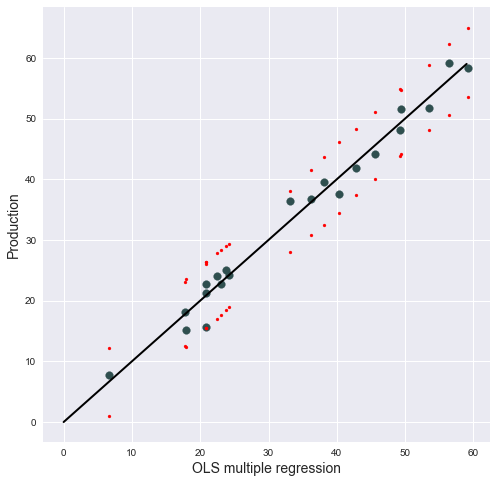

In [15]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(results.predict(), y, s = 60, color="darkslategray")

ax1.plot(np.arange(0, max(y), dtype = int), np.arange(0, max(y), dtype = int), '-', lw=2, color="k")
ax1.set_ylabel('Production', fontsize = '14')
ax1.set_xlabel('OLS multiple regression', fontsize = '14')

#ax1.plot(results.predict(), rsl.conf_int(obs=True).T[0], 'r--')
#ax1.plot(results.predict(), rsl.conf_int(obs=True).T[1], 'r--')

ax1.scatter(results.predict(), rsl.conf_int(obs=True).T[0], marker = '.', s = 35, color="r")
ax1.scatter(results.predict(), rsl.conf_int(obs=True).T[1], marker = '.', s = 35, color="r");

In [16]:
data = data.sort_values('Production')

In [17]:
data

,Gross pay,Phi-h,Position,Pressure,Production,obs_pi_lower,obs_pi_upper,prediction
4,4.1,24.6,2.9,11,7.71,1.006422,12.142801,6.574611
0,0.1,0.5,2.1,19,15.10,12.349269,23.507864,17.928566
3,3.1,21.7,2.1,17,15.72,15.547178,26.010611,20.778895
6,5.9,23.6,2.1,13,18.11,12.546353,23.004191,17.775272
1,1.0,4.0,1.1,16,21.30,15.419982,26.406397,20.913190
5,4.9,39.2,1.1,12,22.67,17.558218,28.384945,22.971582
2,1.9,19.0,1.0,14,22.75,15.448026,26.339618,20.893822
8,8.1,72.9,2.9,14,24.04,17.048164,27.921283,22.484723
7,7.0,63.0,2.0,13,24.30,19.008724,29.300522,24.154623
9,8.9,35.6,2.8,16,25.11,18.502522,29.056431,23.779477


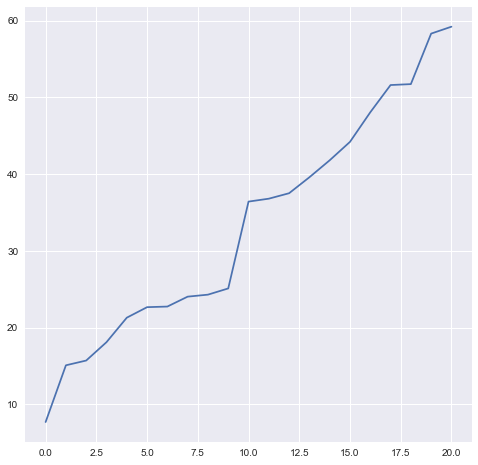

In [18]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(21), data['Production']);

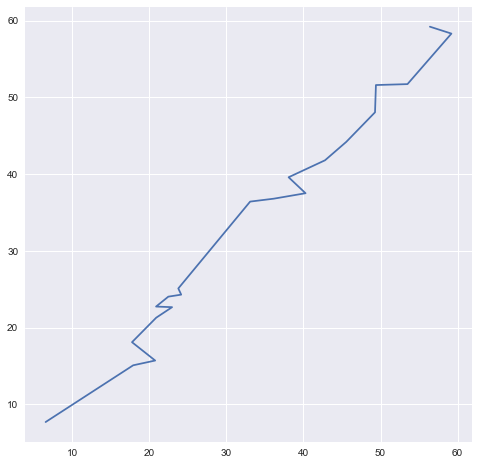

In [19]:
fig = plt.figure(figsize=(8,8))
plt.plot(data['prediction'], data['Production']);

In [20]:
data = data.sort_values('prediction')

In [21]:
data

,Gross pay,Phi-h,Position,Pressure,Production,obs_pi_lower,obs_pi_upper,prediction
4,4.1,24.6,2.9,11,7.71,1.006422,12.142801,6.574611
6,5.9,23.6,2.1,13,18.11,12.546353,23.004191,17.775272
0,0.1,0.5,2.1,19,15.10,12.349269,23.507864,17.928566
3,3.1,21.7,2.1,17,15.72,15.547178,26.010611,20.778895
2,1.9,19.0,1.0,14,22.75,15.448026,26.339618,20.893822
1,1.0,4.0,1.1,16,21.30,15.419982,26.406397,20.913190
8,8.1,72.9,2.9,14,24.04,17.048164,27.921283,22.484723
5,4.9,39.2,1.1,12,22.67,17.558218,28.384945,22.971582
9,8.9,35.6,2.8,16,25.11,18.502522,29.056431,23.779477
7,7.0,63.0,2.0,13,24.30,19.008724,29.300522,24.154623


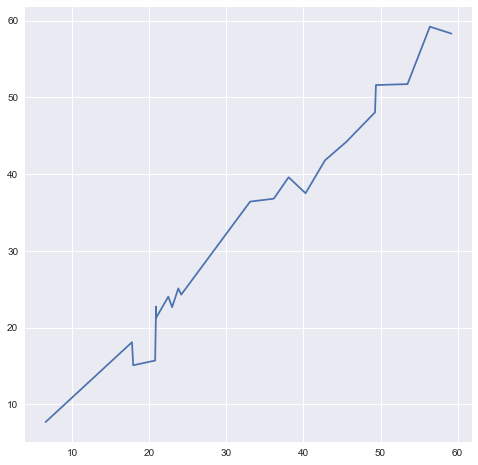

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(data['prediction'], data['Production']);

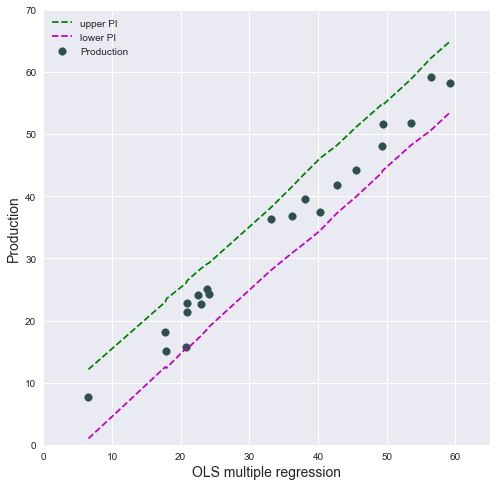

In [23]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(data['prediction'], data['Production'], s = 60, color="darkslategray")



ax1.set_ylabel('Production', fontsize = '14')
ax1.set_xlabel('OLS multiple regression', fontsize = '14')

ax1.plot(data['prediction'], data['obs_pi_upper'], 'g--', label = "upper PI")
ax1.plot(data['prediction'], data['obs_pi_lower'], 'm--', label = "lower PI")
ax1.set_xlim([0,65])
ax1.set_ylim([0,70])

plt.legend();
